# Выбор лейбла

In [1]:
import os
import mne
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest as mul
from matplotlib import pyplot as plt

In [2]:
os.environ["SUBJECTS_DIR"] = "/home/vtretyakova/Рабочий стол/speach_learn/Labels/freesurfer"

In [3]:
stc = mne.read_source_estimate('/net/server/data/home/inside/Niherus_work_transfer/Make_source_for_beta/MAIN_SCRIPT/Source/SourceEstimate/beta_reactclean_15_26/p_val/p-val_full_fdr_r2-end_sub22_interv_merged-lh.stc')
stc.subject = "avg_platon_27sub"

In [4]:
# Читаем лейблы (они должны лежать в той директории, которую мы указали, т.е. во 
#/home/vtretyakova/Рабочий стол/speach_learn/Labels/freesurfer/avg_platon_27sub/label)

labels = mne.read_labels_from_annot('avg_platon_27sub', 'aparc.a2009s')

Reading labels from parcellation...
   read 75 labels from /home/vtretyakova/Рабочий стол/speach_learn/Labels/freesurfer/avg_platon_27sub/label/lh.aparc.a2009s.annot
   read 75 labels from /home/vtretyakova/Рабочий стол/speach_learn/Labels/freesurfer/avg_platon_27sub/label/rh.aparc.a2009s.annot


# Из наших данных, мы знаем, что нам нужно выбрать лейблы из левого полушария. Поэтому берем только их из списка aparc.a2009s

In [15]:
labels_lh = []
i = 0
while i <= (len(labels)-1):
    #print(i)
    labels_lh.append(labels[i])
    i = i+2

    
    

In [14]:
len(labels_lh)

75

In [18]:
# Строим лейблы и выбираем вручную
scale = [0.9, 0.99, 1.0]
for label in labels_lh:

    stc_in_label = stc.in_label(label) 
    brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
                                               background = 'white', clim = dict(kind = 'value', pos_lims = scale),
                                               spacing ='ico5', backend = 'mayavi')
    brain.add_label(label, color = 'green', borders=True) # border - show borders or not

    brain.save_image("/home/vtretyakova/Рабочий стол/speach_learn/Labels/left_labels_aparc2009/{0}.jpeg".format(label.name)) 
    brain.close

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_time = -1.950,
/tmp/ipykernel_1455566/1254178966.py:5: DeprecationWarning: The Mayavi 3D backend is deprecated in 0.24 and will be removed in the next version of MNE-Python. Use the pyvistaqt or notebook backends instead
  brain = mne.viz.plot_source_estimates(stc_in_label, hemi='lh', views = ['lat', 'med'], time_viewer='auto', initial_t

In [1]:
chosen_labels_name = [
    'G_and_S_cingul-Mid-Ant-lh',
    'G_cingul-Post-ventral-lh',
    'G_oc-temp_med-Parahip-lh',
    'S_front_inf-lh',
    'S_front_sup-lh'
]

In [6]:
chosen_labels = [label for label in labels if label.name in chosen_labels_name]
chosen_labels

[<Label | avg_platon_27sub, 'G_and_S_cingul-Mid-Ant-lh', lh : 1942 vertices>,
 <Label | avg_platon_27sub, 'G_cingul-Post-ventral-lh', lh : 575 vertices>,
 <Label | avg_platon_27sub, 'G_oc-temp_med-Parahip-lh', lh : 2288 vertices>,
 <Label | avg_platon_27sub, 'S_front_inf-lh', lh : 2273 vertices>,
 <Label | avg_platon_27sub, 'S_front_sup-lh', lh : 3100 vertices>]

# Находим 10 максимальных вертехсов в каждом лейбле

# Сейчас stc состоят из 3 точек, которые соответсвуют 3 усреденным интервалам. Поскольку мы ищем максимумы только на интервале M, который соответствует средней точке, то нам необходимо получить отдельные файлы для каждого интервала

In [12]:
donor = mne.read_source_estimate('/net/server/data/home/inside/Niherus_work_transfer/Make_source_for_beta/MAIN_SCRIPT/Source/SourceEstimate/beta_reactclean_15_26/p_val_fdr/p-val_no_fdr_r1-st_vs_r2-end_sub22_0.1-0.55_merged')
donor.subject = "avg_platon_27sub"
donor

<SourceEstimate | 20484 vertices, subject : avg_platon_27sub, tmin : 100.0 (ms), tmax : 100.0 (ms), tstep : 50.0 (ms), data shape : (20484, 1), ~240 kB>

In [14]:
stc_M_active2 = []
for i in range(len(stc.data)):
    s = stc.data[i][1]
    stc_M_active2.append(s)
    
print(len(stc_M_active2))

stc_M_active2 = np.array(stc_M_active2)
stc_M_active2 = stc_M_active2[:, np.newaxis]
print(stc_M_active2.shape) 
donor.data = stc_M_active2

20484
(20484, 1)


In [15]:
stc_in_label_0 = donor.in_label(chosen_labels[0])
stc_in_label_0

<SourceEstimate | 125 vertices, subject : avg_platon_27sub, tmin : 100.0 (ms), tmax : 100.0 (ms), tstep : 50.0 (ms), data shape : (125, 1), ~2 kB>

In [26]:
stc_in_label_0_data = stc_in_label_0.data

In [37]:
stc_in_label_0_data_reshape = np.reshape(stc_in_label_0_data, (125,))


0.9997508

In [69]:
stc_in_label_0_data_reshape_abs = np.abs(stc_in_label_0_data_reshape)

https://pyprog.pro/sort/argmax.html

# Индекс вертекса с максимальным pvalue

In [31]:
max_index_0 = np.argmax(stc_in_label_0_data, axis = 0)
max_index_0

array([77])

# Индексы 10 самых значимых вертексов

https://askdev.ru/q/kak-poluchit-indeksy-n-maksimalnyh-znacheniy-v-massive-numpy-4667/

In [39]:
idx = (-stc_in_label_0_data_reshape).argsort()[:10]
idx

array([ 77,  76,  75,  15, 103,  74,  52,  37,  35, 107])

# Тоже другим способом

In [40]:
ind = np.argpartition(stc_in_label_0_data_reshape, -10)[-10:]
ind

array([107,  35,  37, 103,  77,  52,  15,  74,  75,  76])

# Сначала находим абсолютные значения pvalue

In [71]:
ind_abs = np.argpartition(stc_in_label_0_data_reshape_abs, -10)[-10:]
ind_abs

array([107,  35,  37, 103,  77,  52,  15,  74,  75,  76])

# Загружаем данные для тайм курсов (неусреденные)

In [44]:
stc_active1_mean_beta = mne.read_source_estimate('/net/server/data/home/inside/Niherus_work_transfer/Make_source_for_beta/MAIN_SCRIPT/Source/SourceEstimate/beta_reactclean_15_26/mean_conds/mean_conds_reactactive1-st_sub22_integ50-lh.stc')
stc_active1_mean_beta.subject = "avg_platon_27sub"
stc_active1_mean_beta

<SourceEstimate | 20484 vertices, subject : avg_platon_27sub, tmin : -2000.0 (ms), tmax : 1950.0000000000002 (ms), tstep : 50.0 (ms), data shape : (20484, 80), ~6.4 MB>

In [49]:
brain = mne.viz.plot_source_estimates(stc_active1_mean_beta, hemi='lh', views = 'med')

Using control points [0.10867742 0.12816209 0.27987526]


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1073, 277) to (1088, 288) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x555fe8324bc0] Warning: data is not aligned! This can lead to a speed loss


In [54]:
stc_active1_mean_beta_in_label_0 = stc_active1_mean_beta.in_label(chosen_labels[0])
stc_active1_mean_beta_in_label_0

<SourceEstimate | 125 vertices, subject : avg_platon_27sub, tmin : -2000.0 (ms), tmax : 1950.0000000000002 (ms), tstep : 50.0 (ms), data shape : (125, 80), ~40 kB>

In [55]:
stc_active1_mean_beta_in_label_0_data = stc_active1_mean_beta_in_label_0.data
stc_active1_mean_beta_in_label_0_data

array([[-0.26859432, -0.06491767, -0.02860713, ..., -0.01901424,
        -0.03307396, -0.06826081],
       [-0.24741395, -0.04359976, -0.01462135, ..., -0.02119666,
        -0.03267041, -0.06005796],
       [-0.28010154, -0.05775957, -0.01081613, ...,  0.00987309,
         0.00342405, -0.03979674],
       ...,
       [-0.26415595, -0.05786348, -0.02627725, ...,  0.00406738,
        -0.01672252, -0.0681386 ],
       [-0.2590865 , -0.05234123, -0.02504157, ...,  0.00048976,
        -0.01431135, -0.0660546 ],
       [-0.2596131 , -0.04539985, -0.01326144, ..., -0.01049719,
        -0.0278684 , -0.06872154]], dtype=float32)

In [56]:
stc_active1_mean_beta_in_label_0_data_for_timecourse = stc_active1_mean_beta_in_label_0_data[ind]
stc_active1_mean_beta_in_label_0_data_for_timecourse.shape

(10, 80)

In [59]:
stc_active1_mean_beta_in_label_0_data_for_timecourse_mean = stc_active1_mean_beta_in_label_0_data_for_timecourse.mean(axis = 0)
stc_active1_mean_beta_in_label_0_data_for_timecourse_mean.shape

(80,)

In [64]:
stc_active1_mean_beta_in_label_0_data_for_timecourse_mean

array([-0.2785359 , -0.05899585, -0.00995677, -0.00358595, -0.01835218,
       -0.01329186, -0.00415799,  0.00454099,  0.00556799,  0.01027831,
        0.00443714, -0.00294992, -0.00818481, -0.00324765, -0.00565728,
       -0.01457712, -0.01915872, -0.02285519, -0.02824905, -0.02319329,
       -0.0196298 , -0.02460558, -0.02981775, -0.029791  , -0.03707948,
       -0.04140171, -0.03717376, -0.02475488, -0.01757999, -0.03110733,
       -0.03765929, -0.03786151, -0.03536276, -0.03208445, -0.0526989 ,
       -0.06708141, -0.05798874, -0.042844  , -0.04765216, -0.04590284,
       -0.03075496, -0.01135751, -0.00755176, -0.01357323, -0.01413389,
       -0.00194298,  0.00695942,  0.01714833,  0.00962866, -0.0003964 ,
       -0.01456011, -0.02458487, -0.02316674, -0.01225101, -0.00265054,
        0.00134836, -0.00363027, -0.00104598, -0.00155506, -0.00630152,
       -0.01979432, -0.02333082, -0.01013367, -0.00270071, -0.01287142,
       -0.01022612, -0.0019809 , -0.00091581, -0.00516841, -0.00

In [62]:
beta_in_label_0 = list(stc_active1_mean_beta_in_label_0_data_for_timecourse_mean)

In [65]:
stc_active1_mean_beta.times

array([-2.  , -1.95, -1.9 , -1.85, -1.8 , -1.75, -1.7 , -1.65, -1.6 ,
       -1.55, -1.5 , -1.45, -1.4 , -1.35, -1.3 , -1.25, -1.2 , -1.15,
       -1.1 , -1.05, -1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 ,
       -0.65, -0.6 , -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25,
       -0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,
        0.25,  0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,
        0.7 ,  0.75,  0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,
        1.15,  1.2 ,  1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,
        1.6 ,  1.65,  1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95])

In [66]:
stc_active1_mean_beta.times.shape

(80,)

In [67]:
time_points = list(stc_active1_mean_beta.times)

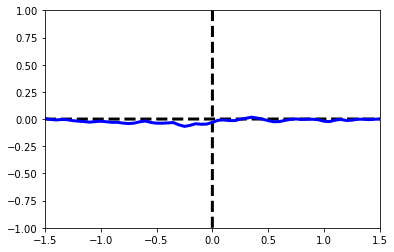

In [77]:
plt.figure() #создаем рисунок 
plt.rcParams['axes.facecolor'] = 'none' # делаем его прозрачным
plt.xlim(-1.5, 1.5) #назначаем границы рисунка по х
plt.ylim(-1.0, 1.0) #назначаем границы рисунка по у
#plt.title('norisk, фидбеки усреднялись отдельно', fontsize = 8) 
plt.plot([0, 0.001], [-1, 1], color='k', linewidth=3, linestyle='--', zorder=1) # вертикальная линия, которая показывает, где находится наше событие
plt.plot([-1.5, 1.5], [0, 0.001], color='k', linewidth=3, linestyle='--', zorder=1) # нулевая линия по горизонтали

plt.plot(time_points, beta_in_label_0, color='b', linewidth=3) # рисует график первого кондишена (всегда синий)
    

# Active2

In [51]:
stc_active2_mean_beta = mne.read_source_estimate('/net/server/data/home/inside/Niherus_work_transfer/Make_source_for_beta/MAIN_SCRIPT/Source/SourceEstimate/beta_reactclean_15_26/mean_conds/mean_conds_reactactive2-end_sub22_integ50-lh.stc')
stc_active2_mean_beta.subject = "avg_platon_27sub"
stc_active2_mean_beta

<SourceEstimate | 20484 vertices, subject : avg_platon_27sub, tmin : -2000.0 (ms), tmax : 1950.0000000000002 (ms), tstep : 50.0 (ms), data shape : (20484, 80), ~6.4 MB>

In [53]:
brain = mne.viz.plot_source_estimates(stc_active2_mean_beta, hemi='lh', views = 'med')

Using control points [0.0974405  0.10917095 0.26644048]


In [78]:
stc_active2_mean_beta_in_label_0 = stc_active2_mean_beta.in_label(chosen_labels[0])
stc_active2_mean_beta_in_label_0

<SourceEstimate | 125 vertices, subject : avg_platon_27sub, tmin : -2000.0 (ms), tmax : 1950.0000000000002 (ms), tstep : 50.0 (ms), data shape : (125, 80), ~40 kB>

In [79]:
stc_active2_mean_beta_in_label_0_data = stc_active2_mean_beta_in_label_0.data
stc_active2_mean_beta_in_label_0_data_for_timecourse = stc_active2_mean_beta_in_label_0_data[ind]
print(stc_active1_mean_beta_in_label_0_data_for_timecourse.shape)


stc_active2_mean_beta_in_label_0_data_for_timecourse_mean = stc_active2_mean_beta_in_label_0_data_for_timecourse.mean(axis = 0)
print(stc_active2_mean_beta_in_label_0_data_for_timecourse_mean.shape)
beta_in_active2_label_0 = list(stc_active2_mean_beta_in_label_0_data_for_timecourse_mean)

(10, 80)
(80,)


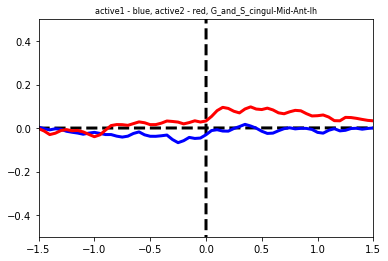

In [81]:
plt.figure() #создаем рисунок 
plt.rcParams['axes.facecolor'] = 'none' # делаем его прозрачным
plt.xlim(-1.5, 1.5) #назначаем границы рисунка по х
plt.ylim(-0.5, 0.5) #назначаем границы рисунка по у
plt.title('active1 - blue, active2 - red, G_and_S_cingul-Mid-Ant-lh', fontsize = 8) 
plt.plot([0, 0.001], [-1, 1], color='k', linewidth=3, linestyle='--', zorder=1) # вертикальная линия, которая показывает, где находится наше событие
plt.plot([-1.5, 1.5], [0, 0.001], color='k', linewidth=3, linestyle='--', zorder=1) # нулевая линия по горизонтали

plt.plot(time_points, beta_in_label_0, color='b', linewidth=3) # рисует график первого кондишена (всегда синий)
plt.plot(time_points, beta_in_active2_label_0, color='r', linewidth=3) # active 2    

# скрипт для построения таймкурсов на вертексах с максимальным pvalue в лейбле см. time_courses_for_labels.py